In [1]:
import pandas as pd
import csv
import os
import json
import numpy as np
from citipy import citipy
import requests
import matplotlib.pyplot as plt


In [2]:
os.chdir("../../python-api-challenge")

In [3]:
from config import api_key

In [4]:
from datetime import date

today = date.today()

d1 = today.strftime("%m/%d/%Y")
print("Today's Date:", d1)

Today's Date: 01/18/2021


In [5]:
# create list of random latitudes evenly distributed across globe

lat = np.random.uniform(low=-90.000, high=90.000, size=2000)

In [6]:
# create list of random longitudes evenly distributed across globe

long = np.random.uniform(low=-180.000, high=180.000, size=2000)

In [7]:
# combine lat and long

latlong = zip(lat, long)

In [8]:
# create list of latitude and longitude combinations 

coordinates=list(latlong)

In [9]:
latlong

In [10]:
coordinates

[(75.03832335140345, 11.793833015981306),
 (21.091979775619222, 153.7339263497924),
 (19.15744175628535, 83.32136688126718),
 (-1.3039652475003862, -113.30616011478004),
 (86.74308880658958, -115.92656577358649),
 (1.438123506763418, 148.5241305296064),
 (-5.121191973615893, 156.63898374231968),
 (-76.84674258263229, -66.78237194515813),
 (54.45899145779518, 135.68352534922167),
 (23.285155619980287, -75.30766252943346),
 (-36.56841507378118, -144.34018564328858),
 (-39.96505111307836, 16.376530068432032),
 (33.533232180185195, 68.4283725444327),
 (-5.754967492972526, -144.9693812300913),
 (51.07520160130804, 140.85039101590002),
 (74.5328557932745, -113.61794613458133),
 (65.48160166979466, -30.0950186456825),
 (80.93124243482754, -168.24550857397054),
 (15.114180387138845, -151.63193204446245),
 (-9.214795964731536, 11.237887521934113),
 (-47.829348235736674, 100.24118510306596),
 (-39.523625059120334, 161.72952028444575),
 (-1.4840022798586716, 92.41006396371051),
 (17.7471332284737

In [11]:
# create empty lists to be populated in loops

cities=[]

city_name=[]
city_id=[]
latitude=[]
longitude=[]
max_temp=[]
humidity=[]
wind_speed=[]
cloudiness=[]

In [12]:
# populate cities list

for x in coordinates:
    city = citipy.nearest_city(x[0],x[1]).city_name
    if city not in cities:
        cities.append(city)
  

In [13]:
# create vairable for base url to be used when making api calls

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
# city = []



In [14]:
# loop through city names and create unique api calls for each city
# populate lists for desired fields from returned json
# skip cities that so not result in a successful api call

for city in cities:

    query_url = url + "&appid=" + api_key + "&q=" + city
    weather_response = requests.get(query_url).json()

    try:
        city_name.append(weather_response["name"])
        city_id.append(weather_response["id"])
        latitude.append(weather_response["coord"]["lat"])
        longitude.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        wind_speed.append(weather_response["wind"]["speed"])
        cloudiness.append(weather_response["clouds"]["all"])
        print(city, "success")
    except:
        print(city, "CITY NOT FOUND!")
    pass


barentsburg CITY NOT FOUND!
katsuura success
rayagada success
coahuayana success
norman wells success
lorengau success
kieta success
ushuaia success
chumikan success
clarence town success
mataura success
hermanus success
gazni CITY NOT FOUND!
atuona success
de-kastri success
yellowknife success
olafsvik success
barrow success
hilo success
luanda success
busselton success
te anau success
meulaboh success
sur success
nanortalik success
lagoa success
bethel success
rikitea success
samusu CITY NOT FOUND!
lompoc success
arraial do cabo success
sao felix do xingu success
bristol success
nikolskoye success
mithimna CITY NOT FOUND!
punta arenas success
bluff success
cockburn harbour CITY NOT FOUND!
greiz success
ternate success
hithadhoo success
caravelas success
taolanaro CITY NOT FOUND!
hihifo CITY NOT FOUND!
saint-pierre success
butaritari success
ola success
kavieng success
ribeira grande success
ballesteros success
kruisfontein success
fairbanks success
vaitupu CITY NOT FOUND!
mahebourg s

In [15]:
# create pandas dataframe from lists populated by series of api calls

results_df=pd.DataFrame({"City":pd.Series(city_name), 
                         "ID":pd.Series(city_id),
                         "Latitude":pd.Series(latitude), 
                         "Longitude":pd.Series(longitude), 
                         "Max Temp":pd.Series(max_temp), 
                         "Humidity":pd.Series(humidity), 
                         "Wind Speed":pd.Series(wind_speed),
                         "Cloudiness":pd.Series(cloudiness)
                        })

results_df

,City,ID,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness
0,Katsuura,2112309,35.1333,140.3000,46.40,49,24.16,20
1,Rāyagada,1258289,19.1667,83.4167,60.73,86,0.96,0
2,Coahuayana Viejo,4013679,18.7333,-103.6833,84.20,51,9.22,40
3,Norman Wells,6089245,65.2820,-126.8329,-2.20,84,6.91,20
4,Lorengau,2092164,-2.0226,147.2712,81.93,79,10.58,90
...,...,...,...,...,...,...,...,...
652,Singaraja,1626932,-8.1120,115.0882,77.22,82,6.49,100
653,Salinópolis,3389822,-0.6136,-47.3561,81.88,75,10.42,92
654,Nola,6541905,40.9220,14.5329,37.99,75,1.14,0
655,Chengzhong,1786640,30.9500,113.5500,41.00,60,8.95,0


In [16]:
# export dataframe to a csv file

results_df.to_csv("WeatherPy/results.csv")

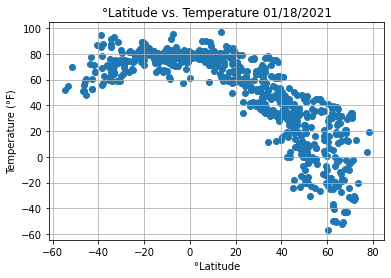

In [17]:
plt.scatter(results_df["Latitude"], results_df["Max Temp"])
plt.title(f"°Latitude vs. Temperature {d1}")
plt.ylabel("Temperature (°F)")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/max_temp.png")

<h1> °Latitude vs. Temperature <h1>
<h3>Not surprisingly, the highest temeratures are nearest the equator.  Since nearly 70% of the planets land is in the northern hemisphere, it makes sense that there are significantly fewer data points in the southern hemisphere.  The seasonal tilt of the Earths axis likely is the cause for relatively higher temps in the south compared to the north.<h3>

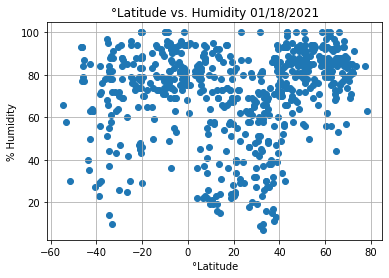

In [18]:
plt.scatter(results_df["Latitude"], results_df["Humidity"])
plt.title(f"°Latitude vs. Humidity {d1}")
plt.ylabel("% Humidity")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/humidity.png")

<h1> °Latitude vs. Humidity <h1>
<h3>Beyond a slight concentration of zero humidity locations, there appears to be little correlation between latitude and humidity levels.<h3>

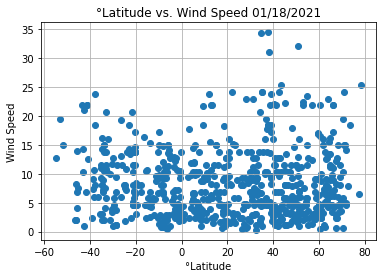

In [19]:
plt.scatter(results_df["Latitude"], results_df["Wind Speed"])
plt.title(f"°Latitude vs. Wind Speed {d1}")
plt.ylabel("Wind Speed")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/wind_speed.png")

<h1> °Latitude vs. Wind Speed <h1>
<h3>Althought the extreme northern latitudes do indicate an increased possibility of some of the higher wind speeds, most of the data indicates little correlation. It is important to note that we lack data points from the extreme southern latitudes that may better bring this significance into focus<h3>

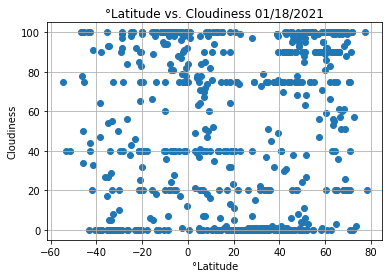

In [20]:
plt.scatter(results_df["Latitude"], results_df["Cloudiness"])
plt.title(f"°Latitude vs. Cloudiness {d1}")
plt.ylabel("Cloudiness")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/cloudiness.png")

<h1> °Latitude vs. Cloudiness <h1>
<h3>There appears to be no significant direct correlation between latitude and cloudiness.s<h3>

In [21]:
# create dataframe of cities in the northern hemisphere

north_hem = results_df.Latitude >= 0
north_df = results_df[north_hem]
north_df
north_df.to_csv("WeatherPy/north_df.csv")

In [22]:
# create dataframe of cities in the southern hemisphere

south_hem = results_df.Latitude < 0
south_df = results_df[south_hem]
south_df
south_df.to_csv("WeatherPy/south_df.csv")

In [23]:
from scipy import stats

def stats_linregress(x,y):
    res = stats.linregress(x,y)
    plt.plot(x, y, "+", label="Cities")
    plt.plot(x, res.intercept + res.slope* x, "r", label="Linear Regression", color="magenta")
    plt.legend()
    plt.xlabel("°Latitude")
    print(f"R-squared: {res.rvalue**2:.6f}")
#     plt.show()

# res = stats.linregress(south_df["Latitude"], south_df["Wind Speed"])

R-squared: 0.684024


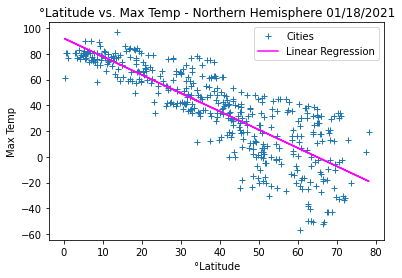

In [24]:
north_temp = stats_linregress(north_df["Latitude"], north_df["Max Temp"])
plt.title(f"°Latitude vs. Max Temp - Northern Hemisphere {d1}")
plt.ylabel("Max Temp")
plt.savefig("figures/north_temp.png")
# plt.show()


R-squared: 0.225896


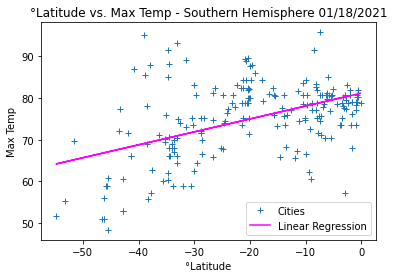

In [25]:
south_temp = stats_linregress(south_df["Latitude"], south_df["Max Temp"])
plt.title(f"°Latitude vs. Max Temp - Southern Hemisphere {d1}")
plt.ylabel("Max Temp")
# plt.show()
plt.savefig("figures/south_temp.png")

<h2>°Latitude vs. Max Temp<h2>
<img src="../figures/north_temp.png" height:50px/>
<img src="../figures/south_temp.png" height:50px/>
<h3>There is a much tighter coorelation to betweem max temp and latitude in the northern hemisphere.  This is likely due to the amount of data points and the relative diversity of the land dispersion in the southern hemisphere.<h3>


R-squared: 0.156491


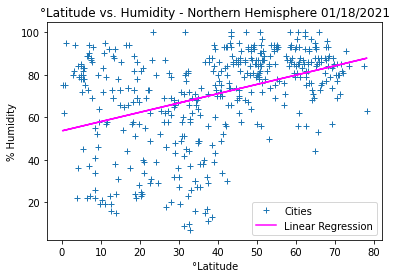

In [26]:
north_humidity = stats_linregress(north_df["Latitude"], north_df["Humidity"])
plt.title(f"°Latitude vs. Humidity - Northern Hemisphere {d1}")
plt.ylabel("% Humidity")
plt.savefig("figures/north_humidity.png")
# plt.show()

R-squared: 0.103738


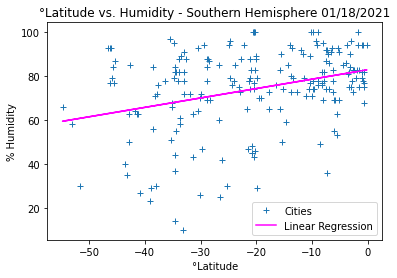

In [27]:
south_humidity = stats_linregress(south_df["Latitude"], south_df["Humidity"])
plt.title(f"°Latitude vs. Humidity - Southern Hemisphere {d1}")
plt.ylabel("% Humidity")
plt.savefig("figures/south_humidity.png")
# plt.show()


<h2>°Latitude vs. Humidity<h2>
<img src="../figures/north_humidity.png" height:50px/>
<img src="../figures/south_humidity.png" height:50px/>
<h3>Although there is a a loose coorelation between latitude and humidity, and that the coorelation is similiar between the hemispheres, nearly all levels of humidity are present at all latitudes.<h3>

R-squared: 0.002366


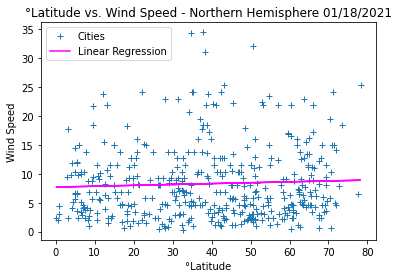

In [28]:
north_wind = stats_linregress(north_df["Latitude"], north_df["Wind Speed"])
plt.title(f"°Latitude vs. Wind Speed - Northern Hemisphere {d1}")
plt.ylabel("Wind Speed")
plt.savefig("figures/north_wind.png")
# plt.show()

R-squared: 0.051015


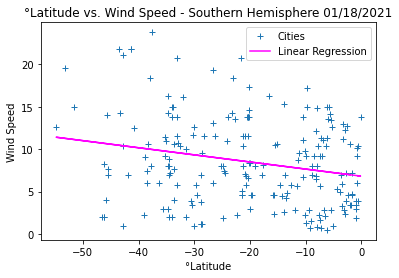

In [29]:
south_wind = stats_linregress(south_df["Latitude"], south_df["Wind Speed"])
plt.title(f"°Latitude vs. Wind Speed - Southern Hemisphere {d1}")
plt.ylabel("Wind Speed")
plt.savefig("figures/south_wind.png")
# plt.show()


<h2>°Latitude vs. Wind Speed<h2>
<img src="../figures/north_wind.png" height:50px/>
<img src="../figures/south_wind.png" height:50px/>
<h3>There is not a notable coorelation between latitude and wind speed.<h3>

R-squared: 0.104417


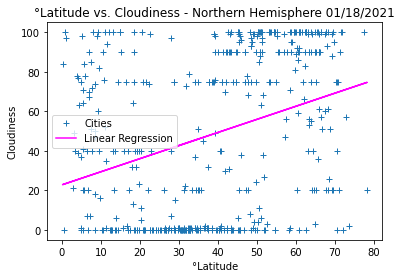

In [30]:
north_cloudiness = stats_linregress(north_df["Latitude"], north_df["Cloudiness"])
plt.title(f"°Latitude vs. Cloudiness - Northern Hemisphere {d1}")
plt.ylabel("Cloudiness")
plt.savefig("figures/north_cloudiness.png")
# plt.show()

R-squared: 0.091070


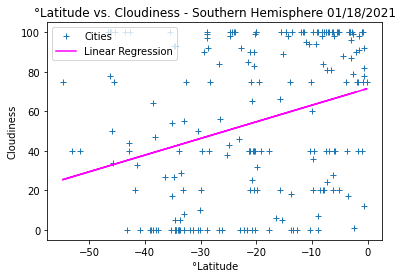

In [31]:
south_cloudiness = stats_linregress(south_df["Latitude"], south_df["Cloudiness"])
plt.title(f"°Latitude vs. Cloudiness - Southern Hemisphere {d1}")
plt.ylabel("Cloudiness")
plt.savefig("figures/south_cloudiness.png")
# plt.show()


<h2>°Latitude vs. Cloudiness<h2>
<img src="../figures/north_cloudiness.png" height:50px/>
<img src="../figures/south_cloudiness.png" height:50px/>
<h3>There is not a notable coorelation between latitude and cloudiness.<h3>